<a href="https://colab.research.google.com/github/bhadaur1/Chollet/blob/master/Chollet_Chap3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Binary classification using IMDB dataset
The IMDB dataset comes packaged with Keras. Set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

In [1]:
from tensorflow import keras
import numpy as np
from keras.datasets import imdb
from inspect import getmro

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument num_words=10000 means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. 

In [3]:
getmro(type(train_data[0]))

(list, object)

In [4]:
word_index = imdb.get_word_index()

In [5]:
reverse_word_index = {value: key for key, value in word_index.items()}

In [6]:
decoded_review = " ".join([reverse_word_index.get(key-3, "?") for key in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”


Let's now vectorize train_data and test_data using one hot encoding.

In [8]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i in range(len(sequences)):
    results[i, sequences[i]] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Vectorize lables

In [9]:
y_train = train_labels.astype('float32')
display(y_train)
y_test = test_labels.astype(np.float32)
display(y_test)

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

### Build the network

In [10]:
10/25

0.4

In [11]:
def get_model_arch():
  from keras import models
  from keras import layers
  
  model = models.Sequential()
  model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

model = get_model_arch()

In [12]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics='accuracy')

In [13]:
history = model.fit(x=x_train, y=y_train, epochs=20, validation_split=0.4, batch_size=512)

Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5323 - accuracy: 0.7669 - val_loss: 0.4201 - val_accuracy: 0.8308
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3173 - accuracy: 0.8981 - val_loss: 0.3101 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2354 - accuracy: 0.9218 - val_loss: 0.2820 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1843 - accuracy: 0.9423 - val_loss: 0.2814 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1507 - accuracy: 0.9545 - val_loss: 0.2929 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1244 - accuracy: 0.9607 - val_loss: 0.2878 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1045 - accuracy: 0.9687 - val_loss: 0.3033 - val_accuracy: 0.8858
Epoch 8/20
30

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

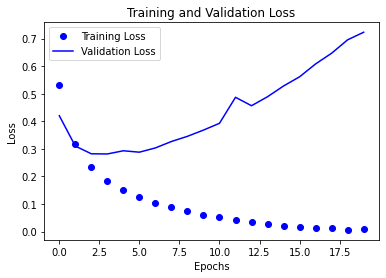

In [21]:
import matplotlib.pyplot as plt

def plot_loss(history):

  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  epochs = history.epoch

  plt.plot(epochs, loss_values, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

plot_loss(history)

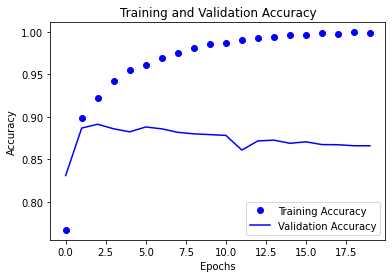

In [25]:
def plot_accuracy(history):
  history_dict = history.history
  accuracy = history_dict['accuracy']
  val_accuracy_values = history_dict['val_accuracy']
  epochs = history.epoch
  plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
  plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

plot_accuracy(history)

Avoid overfitting: restrict training after 4 epochs

In [49]:
def new_model_training(epochs=1):
  from keras import models, layers
  model = models.Sequential()
  model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

  history = model.fit(x_train, y_train, epochs=epochs, batch_size=512, validation_split=0.4)
  results = model.evaluate(x_test, y_test)
  return model, history, results

newmodel, newhistory, test_eval_results = new_model_training(4)

Epoch 1/4
30/30 [==============================] - 1s 37ms/step - loss: 0.5523 - accuracy: 0.7793 - val_loss: 0.4262 - val_accuracy: 0.8671
Epoch 2/4
30/30 [==============================] - 1s 30ms/step - loss: 0.3418 - accuracy: 0.8972 - val_loss: 0.3304 - val_accuracy: 0.8766
Epoch 3/4
30/30 [==============================] - 1s 29ms/step - loss: 0.2463 - accuracy: 0.9203 - val_loss: 0.2861 - val_accuracy: 0.8897
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2923 - accuracy: 0.8824


In [40]:
test_eval_results

[0.10627175867557526, 0.8546000123023987]

In [41]:
newmodel.predict(x_test)

array([[0.19827276],
       [0.99731517],
       [0.14237401],
       ...,
       [0.12825796],
       [0.08282337],
       [0.11610967]], dtype=float32)

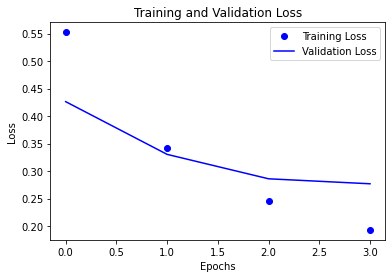

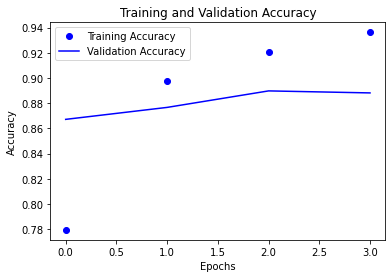

In [50]:
plot_loss(newhistory)
plot_accuracy(newhistory)